        Aerosol- und Nanotechnologie II | Friederike Baumgart | Matr.-Nr. 4343944 | Abgabe: 01.05.22

# Aufgabe 3

In dieser Aufgabe soll bei konstantem Volumenstrom ein geeignetes Reaktorvolumen gefunden werden, bei dem der mittlere Partikeldurchmesser von $3.5~\cdot~10^{-9}~\mathrm{m}$ entsteht. Dafür wird mit verschiedenen Verweilzeiten analytisch die Partikelverteilung und daraus der mittlere Durchmesser berechnet, bis dieser der Vorgabe entspricht. Vorgegangen wird dabei zunächst wie in Aufgabe 1.

### Parameter

In [2]:
import numpy as np
import scipy.integrate
from matplotlib import pyplot as plt

dp_min = 0.5e-9                          # [m]
dp_max = 1000e-9                         # [m]
vp_min = np.pi * (dp_min)**3  /6          # [m^3] Start-Volumen
vp_max = np.pi * (dp_max)**3  /6         # [m^3] End-Volumen
vp_num = int(np.log(vp_max / vp_min) // np.log(2) + 2) #Schrittzahl von min bis max
vp = np.zeros((vp_num))
for i in range(vp_num): 
    vp[i] = vp_min * 2**i 
dp = ( 6 * vp/ np.pi)**(1/3.0) #Zugehöriger Vektor für Durchmesser

# #Verweilzeit
Q = 0.5 # Volumenstrom

#Startwerte
N_0 = 1e17 #start_Zahl

A = 1e-1 # für q(v)

### Funktionen

In [3]:
def fun_q(v): 
    return A * v **(1/3)

#mittlerer Partikeldurchmesser
def dp_avg(n, dp):
    return np.sum(n * dp) / np.sum(n)

#Analytische Lösung:
def an_n(v,tau):
    return (1/(A * v**(1/3.0))) * np.exp(
            (3/2.0) * (vp_min**(2/3.0) - v**(2/3.0))/(A * tau)
            ) * (N_0 / tau)


Um die gesuchte Verweilzeit bzw. das gesuchte Reaktorvolumen zu finden, wird eine while-Schleife durchlaufen. Beginnend mit einer Verweilzeit von einer Sekunde wird die Partikelverteilung, der mittlere Durchmesser und die Differenz zwischen diesem und dem gesuchten berechnet.<br>
Ist diese Abweichung nahezu null, ist der gesuchte Wert erreicht, wird ausgegeben und die while-Schleife beendet. Ist die Differenz größer, wird für den nächsten Durchlauf eine kleinere Verweilzeit gewählt. Um die Rechenzeit zu verkürzen, wird die Abweichung quadriert. 
Eine geringere Differenz zwischen den Verweilzeiten zweier Schritte führt zwar zu einer höheren Genauigkeit. Es wird dadurch jedoch auch Anzahl an Durchläufen erhöht, was die Rechenzeit verlängert. Deshalb wird bei Unterschreiten einer bestimmten Differenz der mittleren Partikeldurchmesser eine höhere Auflösung gewählt.

In [4]:
tau_an = 1      # s
while tau_an > 1e-15:

    n_an = an_n(vp, tau_an)
    dp_av_an = dp_avg(n_an, dp)
    diff = (3.5e-9-dp_av_an)**2
    
    if diff < 1e-31:
        print('tau_an = ', tau_an, ', diff = ', diff, 'B = ', tau_an*Q)
        break
    
    if diff < 1e-30:
        tau_an = 0.99999999*tau_an
    else:
        tau_an = 0.9999*tau_an

tau_an =  3.3197239676150475e-10 , diff =  9.995586146627855e-32 B =  1.6598619838075238e-10


### Plots

Zur Veranschaulichung wird die Differenz zwischen dem berechneten und dem gesuchten mittleren Partikeldurchmesser über die Verweilzeit graphisch dargestellt. Zu sehen ist, dass diese Differenz, wie oben berechnet, bei ca. $3.3~\cdot~10^{-9}~\mathrm{s}$ liegt. 

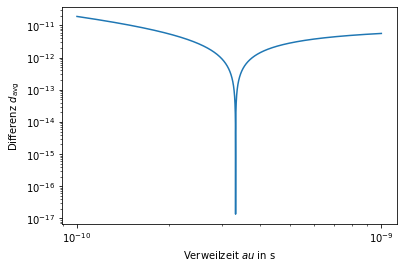

In [7]:
tau = np.linspace(1e-10, 1e-9, 100000)
diff = np.zeros(len(tau))

for i in range(len(tau)):
    n = an_n(vp, tau[i])
    dp_av = dp_avg(n, dp)
    diff[i] = np.abs(3.5e-9-dp_av)

fig, ax = plt.subplots()
plt.plot(tau, diff)
plt.xlabel('Verweilzeit $tau$ in s')
plt.ylabel('Differenz $d_\mathrm{p, avg}$')
ax.set_yscale('log')
ax.set_xscale('log')

Die analytisch und numerisch ermittelte Partikelverteilung bei dieser Verweilzeit bzw. diesem Reaktorvolumen ist in Aufgabe 1 dargestellt.